## 异常商品分类
1.朴素贝叶斯,异常关键词向量 

In [80]:
import pandas as pd
import numpy as np
from gensim import corpora
import gensim
from sklearn.datasets import dump_svmlight_file
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import jieba

In [39]:
#加载数据,筛选模型训练数据
data = pd.read_csv('./model_data/sample_429w.csv',sep='\001')
data =data[data.keys_ab.notnull()]
data

,goodsName,promotionPrice,originalPrice,keys_ab,keys_norl,buy_usr_count,buy_count
51,全新正版 JavaScript从入门到精通 计算机书籍 语言入门经典从入门到精通 数字图像...,54.5,69.8,技术,书籍,0.0,0.0
119,【正版新书限量预售】 《牛散训练营》&mdash;&mdash;&ldquo;教你N个赚钱的...,218,218,赚钱,书,0.0,0.0
129,苹果ipad4 new ipad3 ipad2无线蓝牙键盘 超薄保护套装带休眠外壳,151.8,151.8,蓝牙,NaN,0.0,0.0
279,超小迷你蓝牙耳机4.0苹果三星小米立体声一拖二运动音乐通用型,88,308,蓝牙,NaN,0.0,0.0
331,电信chinanet wlan 6小时天翼无线上网 wifi账号非1天5/3/2小时陆,0.69,6.9,账号,NaN,0.0,0.0
334,电信chinanet 6小时 wlan无线上网账号 非一天1天6小时2小时wifi,0.8,1,账号,NaN,0.0,0.0
335,chinanet 6小时账号 包月稳定 电信wifi wlan 非1一天2小时 特价,0.75,2,账号,NaN,0.0,0.0
336,电信chinanet6小时特价 天翼无线wifi账号 稳定非包月一1天5/3/2,0.75,10,账号,NaN,0.0,0.0
337,chinanet 6小时 中国电信wifi 无线上网账号 天翼wlan 非累计,0.6,5.95,账号,NaN,0.0,0.0
339,电信chinanet 6小时 特价 天翼无线wifi账号 稳定非包月1天5/3/2,0.45,10,账号,NaN,0.0,0.0


In [34]:
#增加电商关键词,再做分词
keywords = pd.read_csv('./data/key_words.csv',header=None)
# jieba.load_userdict(keywords[0].values)
# def segment(title):
#     if title:
#         return '|'.join(jieba.cut(title))
#     else:
#         return np.nan
# data['goodsName'] =data['goodsName'].astype(str)
# data['words'] = data['goodsName'].apply(segment)
# data.head()

In [55]:
#关键词
def spit(title):    
    if title.notnull():
        return title.split('|')
    else:
        return []
data['keys_ab_w'] =data['keys_ab'].apply(spit)
data['keys_norl_w'] =data['keys_norl'].apply(spit)
data['words'] =data['keys_ab_w'] + data['keys_norl_w']
data['label'] = data['buy_usr_count'].apply(lambda a:1 if a>0 else 0)
data.head()

,goodsName,promotionPrice,originalPrice,keys_ab,keys_norl,buy_usr_count,buy_count,keys_ab_w,keys_norl_w,words,label
51,全新正版 JavaScript从入门到精通 计算机书籍 语言入门经典从入门到精通 数字图像...,54.5,69.8,技术,书籍,0.0,0.0,[技术],[书籍],"[技术, 书籍]",0
119,【正版新书限量预售】 《牛散训练营》&mdash;&mdash;&ldquo;教你N个赚钱的...,218,218,赚钱,书,0.0,0.0,[赚钱],[书],"[赚钱, 书]",0
129,苹果ipad4 new ipad3 ipad2无线蓝牙键盘 超薄保护套装带休眠外壳,151.8,151.8,蓝牙,nan,0.0,0.0,[蓝牙],[],[蓝牙],0
279,超小迷你蓝牙耳机4.0苹果三星小米立体声一拖二运动音乐通用型,88,308,蓝牙,nan,0.0,0.0,[蓝牙],[],[蓝牙],0
331,电信chinanet wlan 6小时天翼无线上网 wifi账号非1天5/3/2小时陆,0.69,6.9,账号,nan,0.0,0.0,[账号],[],[账号],0


In [73]:
#词向量
samples = data[['words','label']]
valid = samples.sample(frac=0.2) #模型验证
trian_sam = samples.drop(valid.index) #模型训练
dictionary = corpora.Dictionary(valid['words'].tolist())
dictionary.add_documents(trian_sam['words'].tolist())
# print(sorted(list(dictionary.items()),key=lambda x:x[0]))

[(0, u'\u84dd\u7259'), (1, u'\u8d26\u53f7'), (2, u'\u501f\u8d37\u5b9d'), (3, u'\u501f\u6b3e'), (4, u'\u501f\u94b1'), (5, u'\u653e\u6b3e'), (6, u'\u8d44\u91d1\u5468\u8f6c'), (7, u'\u5145\u503c'), (8, u'\u4ee3\u7f34'), (9, u'\u8d37\u6b3e'), (10, u'\u5c0f\u989d\u8d37\u6b3e'), (11, u'P2P'), (12, u'\u6280\u672f'), (13, u'\u64cd\u4f5c'), (14, u'\u4e66'), (15, u'JD'), (16, u'\u90ae\u7bb1'), (17, u'\u5c0f\u53f7\u6279\u53d1'), (18, u'\u65f6\u65f6\u5f69'), (19, u'\u91d1\u878d\u4e00\u4f53\u673a'), (20, u'\u53e3\u5b50'), (21, u'\u4fe1\u7528\u5361'), (22, u'\u95ea\u7535'), (23, u'\u7f51\u8d5a'), (24, u'\u8d5a\u94b1'), (25, u'\u4e66\u7c4d'), (26, u'\u793e\u4fdd'), (27, u'\u5361\u5939'), (28, u'\u5361\u5305'), (29, u'\u5361\u5957'), (30, u'\u624b\u673aPOS'), (31, u'\u4e00\u6e05'), (32, u'\u89c6\u9891'), (33, u'\u4e03\u4e50\u5f69'), (34, u'\u53cc\u8272\u7403'), (35, u'\u5927\u4e50\u900f'), (36, u'\u5f69\u7968'), (37, u'\u79d2\u5230'), (38, u'\u540d\u7247'), (39, u'\u8682\u8681'), (40, u'\u673a\u5b50')

In [74]:
corpus_vld = [dictionary.doc2bow(title) for title in valid['words']] #(word_index,word_count)
corpus_train = [dictionary.doc2bow(title) for title in trian_sam['words']] 
#save
# corpora.SvmLightCorpus.serialize('./model_data/corpus.svmlight',corpus,labels=samples['label'].tolist())
#to csc matrix
csc_mat_valid = gensim.matutils.corpus2csc(corpus_vld)
csc_mat_train = gensim.matutils.corpus2csc(corpus_train)
csc_mat_valid.shape,csc_mat_train.shape

((199, 8107), (255, 32429))

## 朴素贝叶斯

In [84]:
#NB模型训练
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(csc_mat_train.T, trian_sam['label'], test_size=0.2, random_state=42)
mnb = MultinomialNB(alpha=0.01)
model_NB = mnb.fit(X_train,y_train)
y_pre = model_NB.predict(X_test)
y_pre

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
#评估
m_precision = metrics.precision_score(y_test, y_pre) 
m_recall = metrics.recall_score(y_test, y_pre) 
auc = metrics.roc_auc_score(y_test, y_pre) 
print 'precision:',m_precision,'recall',m_recall, 'auc',auc

precision: 0.844444444444 recall 0.893309222423 auc 0.938985641045


In [95]:
#可视化
# %matplotlib inline
import matplotlib.pyplot as plt
def auc_plot(y_true,y_pre):
    fpr,tpr,th = metrics.roc_curve(y_true, y_pre)
    auc_value = metrics.auc(fpr,tpr)
    plt.plot(fpr,tpr,lw=1,label="ROC fold (AUC=%.2f)" % (auc_value))
    plt.xlim([-0.05,1.0])
    plt.ylim([0, 1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve")
    plt.legend(loc='lower right')
    plt.show()

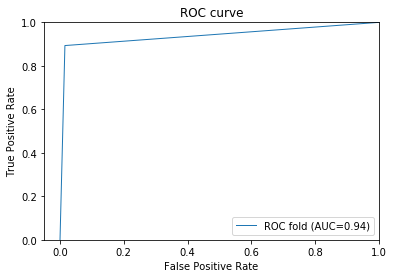

In [96]:
auc_plot(y_test,y_pre)

#### 2.商品名词向量训练

## 花呗额度预测

In [98]:
import xgboost as xgb

In [106]:
#load
samples = pd.read_csv('./model_data/huabei_pre.csv',index_col=0)
samples.shape,samples.head()

((139120, 28),
                                   actualFee_sum  actualFee_mean  \
 uid                                                               
 0001101072642d28cbec77255a351fa1         317.60       52.933333   
 000120625f722f19873e3e08ef3ee0d7         330.80       55.133333   
 0001c5790371fcaec5b9aa8327a905be        5050.85       67.344667   
 0002155afc87ff5734243956f84fae8a          39.40       19.700000   
 00022dd34d5ab0b86d0b93676df27da9        3870.47       56.093768   
 
                                   actualFee_median  actualFee_std  \
 uid                                                                 
 0001101072642d28cbec77255a351fa1              57.4      33.439597   
 000120625f722f19873e3e08ef3ee0d7              47.1      45.429095   
 0001c5790371fcaec5b9aa8327a905be              45.0     100.508308   
 0002155afc87ff5734243956f84fae8a              19.7       5.374012   
 00022dd34d5ab0b86d0b93676df27da9              26.5      64.603769   
 
               

In [107]:
#train
x_train,x_test,y_train,y_test = train_test_split(samples.iloc[:,:-1],samples.iloc[:,-1],test_size=0.3)
d_train = xgb.DMatrix(x_train,label=y_train)
d_val = xgb.DMatrix(x_test,label=y_test)

In [110]:
params = {
    'booster': 'gbtree',
    'objective': 'reg:linear',
    'eta':0.3,
    'min_child_weight':1,
    'max_depth':6,
    'subsample':0.9,
    'lambda':1,
    
    'seed': 3,
    
    'nthread': 4
    }

evals_result = {}
watchlist = [(d_train,'train'),(d_val,'val')]
xgb_model = xgb.train(d_train,num_boost_round=1000,early_stopping_rounds=200,
                      verbose_eval=50,evals=watchlist,evals_result=evals_result)
print min(evals_result['val']['mae'])

TypeError: train() takes at least 2 arguments (6 given)

In [109]:
?xgb.train

In [ ]:
def feature_sort(self):
    features = pd.DataFrame.from_dict(xgb_model.get_fscore())
    feat_top = features.sort_values(by=0,ascending=False).head(20)
    feat_top.plot(kind='barh')
    plt.show()

#### 3. LSTM深度学习分类模型 

2.Word2vec 近义词挖掘(gensim包,word2vec C语言包)